In [66]:
# import of necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
# connecting to the API for the companies
msft = yf.Ticker("MSFT")
aapl = yf.Ticker("AAPL")
ibm = yf.Ticker("IBM")

In [68]:
# retrieving the required company data
msft_info = msft.info
aapl_info = aapl.info
ibm_info = ibm.info

msft_pl = msft.financials
aapl_pl = aapl.financials
ibm_pl = ibm.financials

msft_bs = msft.balance_sheet
aapl_bs = aapl.balance_sheet
ibm_bs = ibm.balance_sheet

msft_cf = msft.cashflow
aapl_cf = aapl.cashflow
ibm_cf = ibm.cashflow

In [69]:
# organizing the values in a dictionary
comp_dict = [
    {"comp": "Microsoft", "info": msft_info, "pl": msft_pl, "bs": msft_bs, "cf": msft_cf},
    {"comp": "Apple", "info": aapl_info, "pl": aapl_pl, "bs": aapl_bs, "cf": aapl_cf},
    {"comp": "IBM", "info": ibm_info, "pl": ibm_pl, "bs": ibm_bs, "cf": ibm_cf}
]

In [70]:
# function to calculate the different financial ratios
def ratio_collection(info, pl, bs, cf):

    net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
    asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
    equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
    leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
    buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
    ROE = net_profit_margin * asset_turnover * equity_mulitplier
    EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

    return net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS

In [71]:
# Loop that iterates through the dictionary and uses the function above
# to calculate the respective ratios.
for entity in comp_dict:
    result = list(ratio_collection(info=entity["info"], pl=entity["pl"], 
    bs=entity["bs"], cf=entity["cf"]))

    entity["net_profit_margin"] = result[0]
    entity["asset_turnover"] = result[1]
    entity["equity_mulitplier"] = result[2]
    entity["leverage"] = result[3]
    entity["buyback_ratio"] = result[4]
    entity["ROE"] = result[5]
    entity["EPS"] = result[6]

In [72]:
# organizing the results in a dataframe
df = pd.DataFrame(comp_dict)
df = df.drop(columns=["info", "pl", "bs", "cf"])
df.head()

,comp,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,Microsoft,0.366863,0.543444,2.190679,1.190679,0.017900,0.436755,9.757635
1,Apple,0.253096,1.117852,6.961537,5.961537,0.040026,1.969589,6.273722
2,IBM,0.100138,0.434474,6.983810,5.978784,0.002387,0.303846,6.407310


In [73]:
info = msft_info
pl = msft_pl
bs = msft_bs
cf = msft_cf

In [74]:
#info = aapl_info
#pl = aapl_pl
#bs = aapl_bs
#cf = aapl_cf

In [75]:
#info = ibm_info
#pl = ibm_pl
#bs = ibm_bs
#cf = ibm_cf

In [76]:
# cash financed, assuming no interest earned on cash
stock_buyback_cash = 5e9
stock_buyback_stock = stock_buyback_cash / 252

bs.loc["Total Stockholder Equity"][0] -= stock_buyback_cash
cf.loc["Repurchase Of Stock"] -= stock_buyback_cash
info["sharesOutstanding"] -= stock_buyback_stock

bs.loc["Cash"][0] -= stock_buyback_cash

# ratios
net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
ROE = net_profit_margin * asset_turnover * equity_mulitplier
EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

print(f"old net_profit_margin: {df.loc[0][1]}")
print(f"new net_profit_margin: {net_profit_margin}")
print(f"old asset_turnover: {df.loc[0][2]}") 
print(f"new asset_turnover: {asset_turnover}")
print(f"old equity_mulitplier: {df.loc[0][3]}") 
print(f"new equity_mulitplier: {equity_mulitplier}")
print(f"old leverage: {df.loc[0][4]}")
print(f"new leverage: {leverage}")
print(f"old buyback_ratio: {df.loc[0][5]}")
print(f"new buyback_ratio: {buyback_ratio}")
print(f"old ROE: {df.loc[0][6]}")
print(f"new ROE: {ROE}")
print(f"old EPS: {df.loc[0][7]}")
print(f"new EPS: {EPS}")

old net_profit_margin: 0.3668633681343622
new net_profit_margin: 0.3668633681343622
old asset_turnover: 0.5434437013485364
new asset_turnover: 0.5434437013485364
old equity_mulitplier: 2.1906786276134547
new equity_mulitplier: 2.258483861782075
old leverage: 1.1906786276134549
new leverage: 1.2275321588193782
old buyback_ratio: 0.01790022912472676
new buyback_ratio: 0.020637602064035355
old ROE: 0.43675469250999743
new ROE: 0.45027299402013093
old EPS: 9.757635163184041
new EPS: 9.78367598856516


In [77]:
change_cf = [
    ['old_value', df.loc[0][1], df.loc[0][2], df.loc[0][3], df.loc[0][4], df.loc[0][5], df.loc[0][6], df.loc[0][7]],
    ['new_value', net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS] 
]
change_cf_table = pd.DataFrame(change_cf, columns =['ratio','net_profit_margin', 'asset_turnover', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'])
change_cf_table


,ratio,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,old_value,0.366863,0.543444,2.190679,1.190679,0.017900,0.436755,9.757635
1,new_value,0.366863,0.543444,2.258484,1.227532,0.020638,0.450273,9.783676


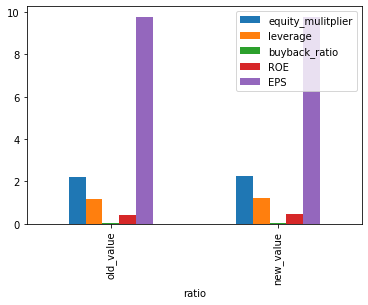

In [78]:
change_cf_table.plot(x='ratio', y=['equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'], kind='bar')
plt.show()

In [79]:
# debt financed, assuming 4% interest on new debt and no change in taxes
stock_buyback_cash = 5e9
stock_buyback_stock = stock_buyback_cash / 252

bs.loc["Total Stockholder Equity"][0] -= stock_buyback_cash
cf.loc["Repurchase Of Stock"] -= stock_buyback_cash
info["sharesOutstanding"] -= stock_buyback_stock

bs.loc["Total Liab"][0] += stock_buyback_cash
pl.loc["Net Income"][0] -= (stock_buyback_cash * (4 / 100))

# ratios
net_profit_margin = pl.loc["Net Income"][0] / pl.loc["Total Revenue"][0]
asset_turnover = pl.loc["Total Revenue"][0] / bs.loc["Total Assets"][0]
equity_mulitplier = bs.loc["Total Assets"][0] / bs.loc["Total Stockholder Equity"][0]
leverage = bs.loc["Total Liab"][0] / bs.loc["Total Stockholder Equity"][0]
buyback_ratio = cf.loc["Repurchase Of Stock"][0] * -1 / info["marketCap"]
ROE = net_profit_margin * asset_turnover * equity_mulitplier
EPS = pl.loc["Net Income"][0] / info["sharesOutstanding"]

print(f"old net_profit_margin: {df.loc[0][1]}")
print(f"new net_profit_margin: {net_profit_margin}")
print(f"old asset_turnover: {df.loc[0][2]}") 
print(f"new asset_turnover: {asset_turnover}")
print(f"old equity_mulitplier: {df.loc[0][3]}") 
print(f"new equity_mulitplier: {equity_mulitplier}")
print(f"old leverage: {df.loc[0][4]}")
print(f"new leverage: {leverage}")
print(f"old buyback_ratio: {df.loc[0][5]}")
print(f"new buyback_ratio: {buyback_ratio}")
print(f"old ROE: {df.loc[0][6]}")
print(f"new ROE: {ROE}")
print(f"old EPS: {df.loc[0][7]}")
print(f"new EPS: {EPS}")

old net_profit_margin: 0.3668633681343622
new net_profit_margin: 0.36585464265900036
old asset_turnover: 0.5434437013485364
new asset_turnover: 0.5434437013485364
old equity_mulitplier: 2.1906786276134547
new equity_mulitplier: 2.3306205363416845
old leverage: 1.1906786276134549
new leverage: 1.298680226392917
old buyback_ratio: 0.01790022912472676
new buyback_ratio: 0.02337497500334395
old ROE: 0.43675469250999743
new ROE: 0.46337724061274294
old EPS: 9.757635163184041
new EPS: 9.782883053556757


In [80]:
change_df = [
    ['old_value', df.loc[0][1], df.loc[0][2], df.loc[0][3], df.loc[0][4], df.loc[0][5], df.loc[0][6], df.loc[0][7]],
    ['new_value', net_profit_margin, asset_turnover, equity_mulitplier, leverage, buyback_ratio, ROE, EPS] 
]
change_df_table = pd.DataFrame(change_df, columns =['ratio','net_profit_margin', 'asset_turnover', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'])
change_df_table

,ratio,net_profit_margin,asset_turnover,equity_mulitplier,leverage,buyback_ratio,ROE,EPS
0,old_value,0.366863,0.543444,2.190679,1.190679,0.017900,0.436755,9.757635
1,new_value,0.365855,0.543444,2.330621,1.298680,0.023375,0.463377,9.782883


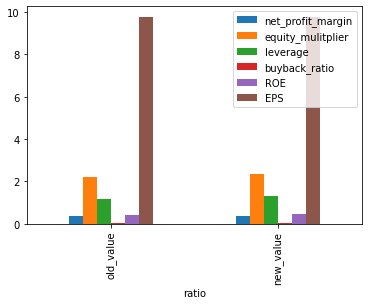

In [81]:
change_df_table.plot(x='ratio', y=['net_profit_margin', 'equity_mulitplier', 'leverage', 'buyback_ratio', 'ROE', 'EPS'], kind='bar')
plt.show()